<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/intro/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The logistic model is given by 
$
\hat{y} = \sigma \left( \mathbf{x}^T \mathbf{w} \right)\,,
$
where $\sigma$ is the sigmoid function. 

Logistic regression is commonly used to estimate the probability that an example belong to a specific binary class, i.e. 
$
\hat{y}  = P (y = 1 |  \mathbf{x})\,.
$

There is no general closed form solution for the weights, so we will use a similar iterative procedure to the perceptron algorithm. Since  the activation function is differentiable we can use gradient descent,  and if the loss function is convex it is guaranteed to find the optimal solution.  Gradient descent proposes a new set of weights

 $
 \mathbf{w}  \rightarrow  \mathbf{w}  - \alpha \nabla_{\mathbf{w}}  L  (\mathbf{w})\,, 
 $

where $\alpha$ is the learning rate, a positive scalar that determines the size of the update. There are several ways to choose $\alpha$, which we will discuss later on. For now we will set it to a small constant.  

We will again attempt to learn the AND and XOR functions, but now use the BCE loss.  In the logistic model the gradient of the BCE loss with respect to the weights can be shown to be 

 $
 \nabla_{\mathbf{w}}  L  (\mathbf{w})  = \frac{1}{N} \sum^N_i \left( \hat{y}^{(i)}  - y^{(i)} \right) \mathbf{x}^{(i)} = \frac{1}{N} \mathbf{X}^T \left( \hat{\mathbf{Y}} -  \mathbf{Y}\right)\,,
 $

Gradient descent for logistic regression therefore strongly resembles the perceptron learning algorithm. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [0]:
def sigmoid(x):
  return 1/(1 + np.exp(-x)) 

Let us first attempt to learn the AND function. We will set the initial weights to a small random value, the learning rate to  𝛼=0.01  and use a fixed number of iterations.



In [44]:
X = np.array([[1,0,0], [1,0,1], [1,1,0], [1,1,1]])
print(X)

[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]


In [45]:
Y = np.array([[0], [0], [0], [1]])
print(Y)

[[0]
 [0]
 [0]
 [1]]


In [46]:
np.random.seed(0)
w = 0.1 * np.random.random(size=(3, 1))
print(w)

[[0.05488135]
 [0.07151894]
 [0.06027634]]


In [0]:
learning_rate = 0.01
num_epochs = 100

In [0]:
for i in range(num_epochs):
  Yhat = sigmoid(np.matmul(X, w))
  w += learning_rate * np.matmul(X.T, Y - Yhat)

In [49]:
print(w)

[[-0.68417003]
 [ 0.17753368]
 [ 0.16872588]]


In [50]:
Yhat = sigmoid(np.matmul(X, w))
print(Yhat)

[[0.33533123]
 [0.37391816]
 [0.37598237]
 [0.41631714]]


In [0]:
id0 = np.where(Y[:, 0] == 0)
id1 = np.where(Y[:, 0] == 1)

In [0]:
xx, yy = np.mgrid[-1:2:.01, -1:2:.01]
Yhat = sigmoid(w[0] + w[1] * xx + w[2] * yy)

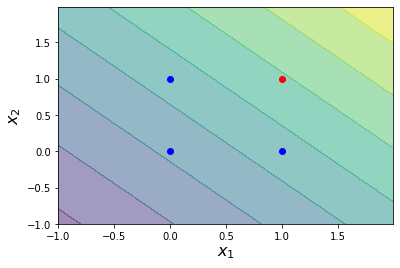

In [53]:
plt.figure()
plt.contourf(xx, yy, Yhat, alpha=0.5)
plt.scatter(X[id0, 1], X[id0, 2], color='blue')
plt.scatter(X[id1, 1], X[id1, 2], color='red')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()

In [54]:
Y = np.array([[0], [1], [1], [0]])
print(Y)

[[0]
 [1]
 [1]
 [0]]


In [55]:
np.random.seed(0)
w = 0.1 * np.random.random(size=(3, 1))
print(w)

[[0.05488135]
 [0.07151894]
 [0.06027634]]


In [0]:
for i in range(num_epochs):
  Yhat = sigmoid(np.matmul(X, w))
  w += learning_rate * np.matmul(X.T, Y - Yhat)

In [57]:
print(w)

[[-0.00416059]
 [ 0.03042219]
 [ 0.02166683]]


In [58]:
Yhat = sigmoid(np.matmul(X, w))
print(Yhat)

[[0.49895986]
 [0.50437645]
 [0.50656502]
 [0.51197981]]


In [0]:
id0 = np.where(Y[:, 0] == 0)
id1 = np.where(Y[:, 0] == 1)

In [0]:
xx, yy = np.mgrid[-1:2:.01, -1:2:.01]
Yhat = sigmoid(w[0] + w[1] * xx + w[2] * yy)

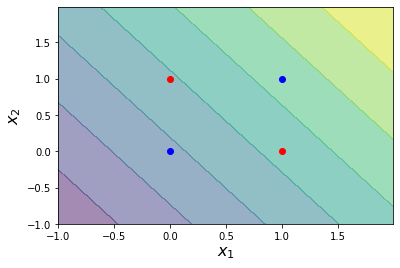

In [61]:
plt.figure()
plt.contourf(xx, yy, Yhat, alpha=0.5)
plt.scatter(X[id0, 1], X[id0, 2], color='blue')
plt.scatter(X[id1, 1], X[id1, 2], color='red')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()